# EDA, analyse et nettoyage des données

Import des différentes librairies

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Récupération de la base de données sous forme de dataframe :

In [65]:
immoSV_df = pd.read_csv(r'C:\Users\Admin\Documents\marianneSimplon\simplon\immo_SiliconValley_marianneD\data\traindata_ori.csv',delimiter=',', decimal='.')
immoSV_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


### Exploration globale des données du dataframe

In [66]:
immoSV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [67]:
immoSV_df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Unnamed: 0 semble être l'index du fichier d'origine : il n'apporte pas d'information je le supprime de ma base de données

In [68]:
immoSV_df_net = immoSV_df.copy()

# Supression de la colonne Unnamed: 0
immoSV_df_net = immoSV_df_net.drop("Unnamed: 0", axis=1)

### Données manquantes dans la feature total_bedrooms

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms', ylabel='count'>

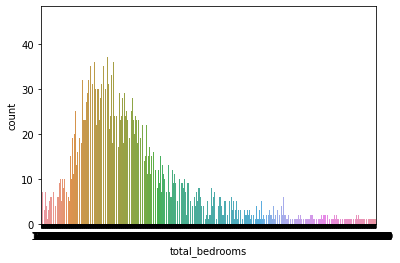

In [69]:
sns.countplot(immoSV_df['total_bedrooms'])

In [70]:
immoSV_df['total_bedrooms'].value_counts()

280.0     46
315.0     41
291.0     41
348.0     40
287.0     40
          ..
1550.0     1
1797.0     1
1743.0     1
1090.0     1
2479.0     1
Name: total_bedrooms, Length: 1828, dtype: int64

Le but ci-dessus est de déterminer si je vais utiliser la moyenne ou la médiane pour compléter les données manaquantes. La distribution n'est pas tout a fait gaussienne et il y a des données extrèmes en faible nombre : je choisis la médiane

In [71]:
# Remplissage des donénes manquante par la médiane
immoSV_df_net['total_bedrooms'].fillna(immoSV_df_net['total_bedrooms'].median(),inplace=True)

### Doublons dans le dataframe ?

In [79]:
immoSV_df_net.duplicated().value_counts()

False    16512
dtype: int64

Il n'y a pas de doublons dans le jeu de données.

### Ajout d'une colonne de données numériques pour la variable categorielle ocean_proximity

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


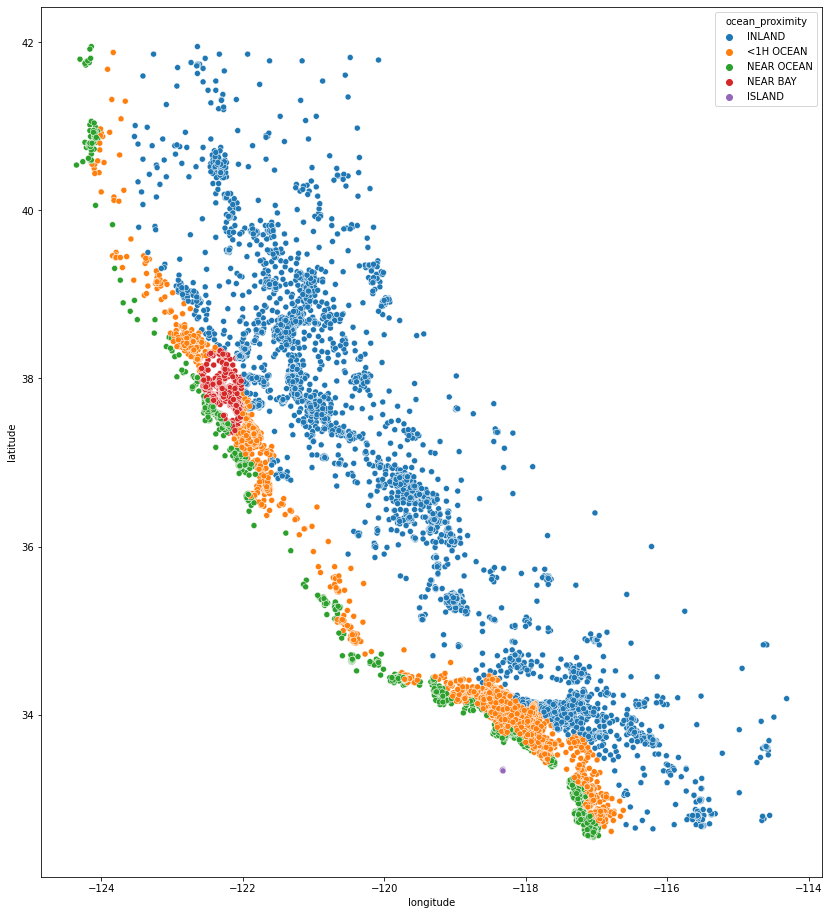

In [101]:
plt.subplots(figsize=(14,16))
sns.scatterplot(immoSV_df_net['longitude'], immoSV_df_net['latitude'], hue=immoSV_df_net['ocean_proximity'])
plt.show()

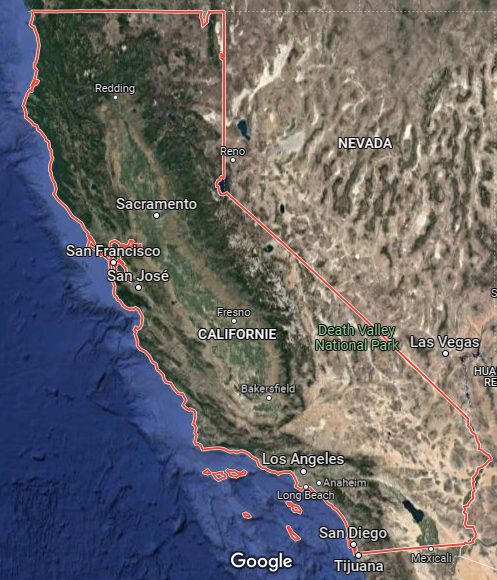

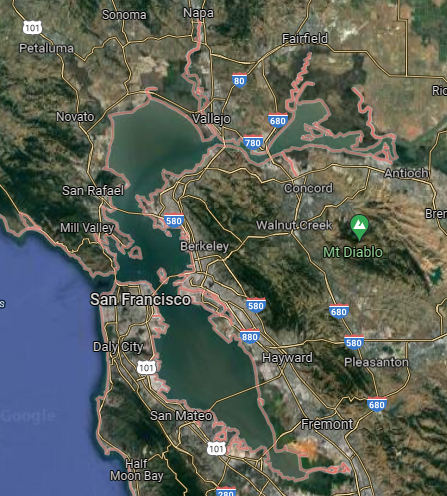

In [102]:
immoSV_df_net.loc[immoSV_df_net['ocean_proximity'] == 'ISLAND', 'ocean_proximity_num'] = 1
immoSV_df_net.loc[immoSV_df_net['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity_num'] = 2
immoSV_df_net.loc[immoSV_df_net['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity_num'] = 3
immoSV_df_net.loc[immoSV_df_net['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity_num'] = 4
immoSV_df_net.loc[immoSV_df_net['ocean_proximity'] == 'INLAND', 'ocean_proximity_num'] = 5

J'attribue des chiffre selon une distance approximative avec l'ocean, en regardant le graphique latitude-longitude coloré par ocean_proximity

In [103]:
immoSV_df_net['ocean_proximity_num'].value_counts()

4.0    7312
5.0    5235
2.0    2140
3.0    1821
1.0       4
Name: ocean_proximity_num, dtype: int64

### Observation de la répartition des données (et des outliers)

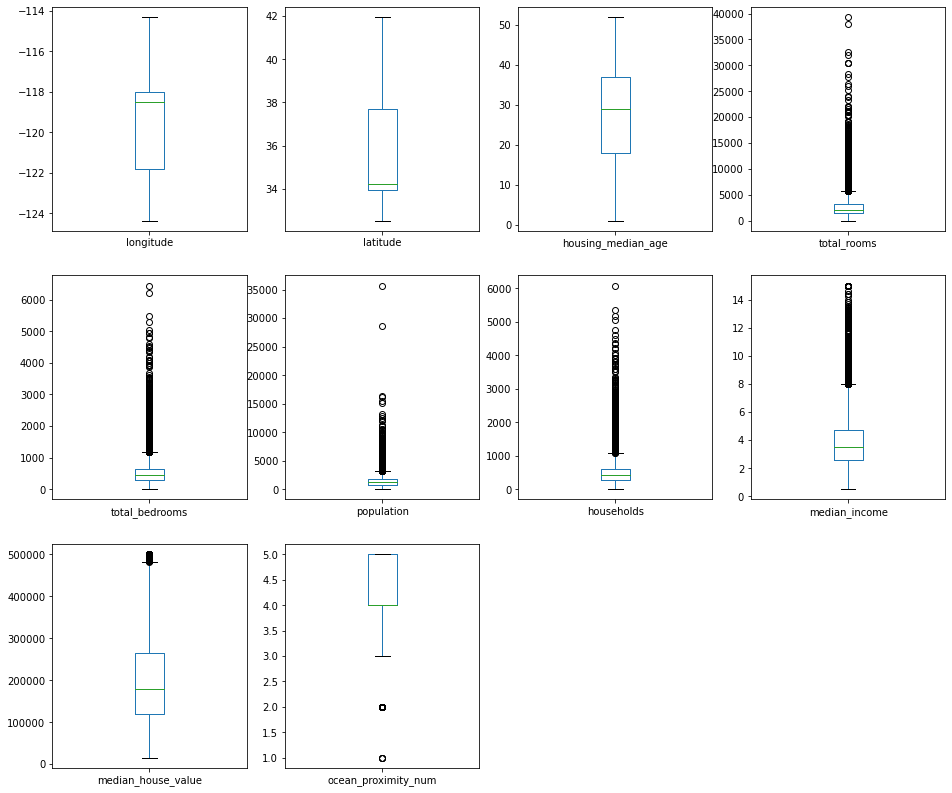

In [104]:
immoSV_df_net.plot(kind='box', subplots=True, layout=(3, 4), figsize = (16, 14));

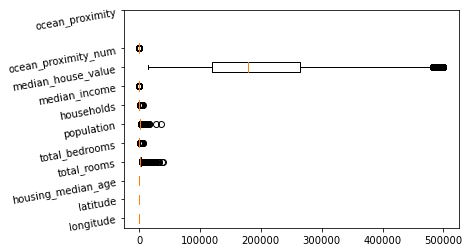

In [105]:
fig, ax = plt.subplots()
ax.boxplot(immoSV_df_net.drop('ocean_proximity', axis=1), vert=0)
plt.yticks([1,2,3,4,5,6,7,8,9,12,10], immoSV_df_net.columns,  rotation = 10)
plt.show()

Sur ces boxplots, on voit qu'il y a beaucoup d'outliers, particulièrement pour total_rooms, total_bedrooms, population, housholds & median_income. <br>
On voit aussi que les échelles sont très différentes, il faudra standardiser les données.

Pour identifier les observations qui sont les outliers (les points noirs des boxplots) :

In [74]:
def findOutliers(column_name):
    df_outl = immoSV_df_net.sort_values(by=[f'{column_name}'])
    df_outl_q1, df_outl_q3 = np.percentile(df_outl[f'{column_name}'],[25,75])
    df_outl_iqr = df_outl_q3 - df_outl_q1
    df_outl_lower_bound = df_outl_q1 -(1.5 * df_outl_iqr)
    df_outl_upper_bound = df_outl_q3 +(1.5 * df_outl_iqr)
    df_outl = df_outl[(df_outl[f'{column_name}'] <= df_outl_lower_bound) | (df_outl[f'{column_name}'] >= df_outl_upper_bound)]
    return df_outl

In [75]:
total_rooms_outl = findOutliers('total_rooms')
total_bedrooms_outl = findOutliers('total_bedrooms')
total_population_outl = findOutliers('population')
total_households_outl = findOutliers('households')
total_median_income_outl = findOutliers('median_income')
total_median_house_value_outl = findOutliers('median_house_value')

**Il y a beaucoup d'outliers..........................................................**

### Exploration globale des données

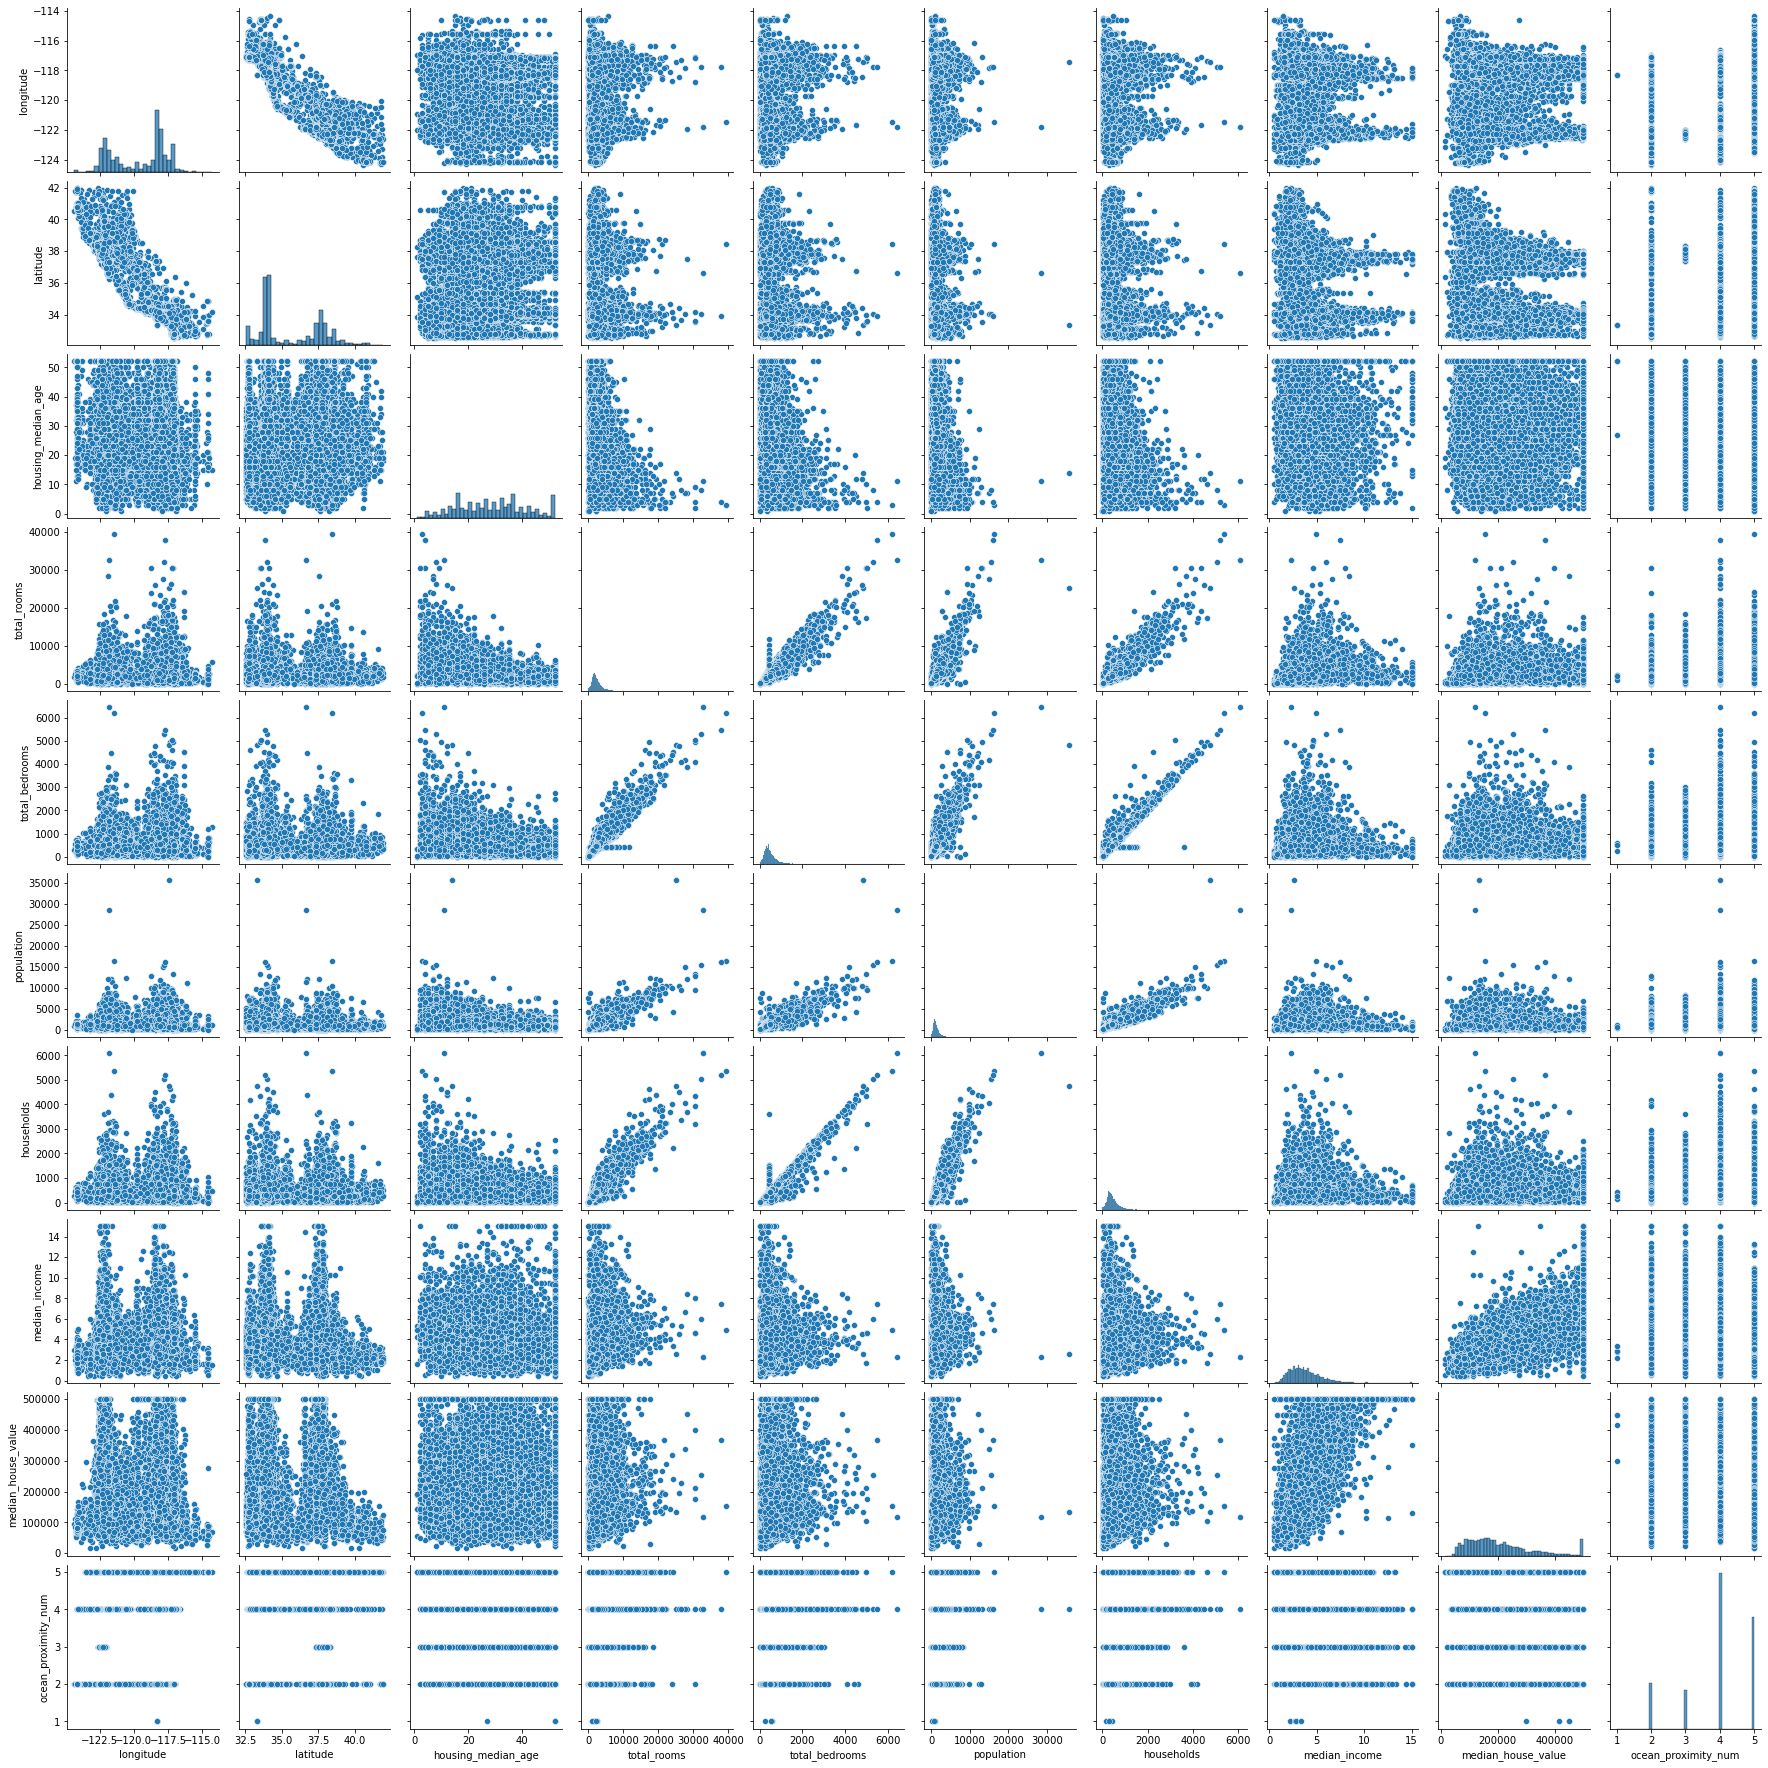

In [106]:
sns.pairplot(data=immoSV_df_net)

**Latitude & Longitude :**
<br>
On observe pour ces deux variables des densités d'observations plus importantes en 2 points (on voit comme une double gaussienne).
<br>
Sur le graphe de la latitude en fonction de la longitude on observe la forme de la Californie, avec les densités d'observations : peu dans le désert, plus forte le long de l'océan et au nord.
<br>
**Housing_median_age :**
<br>
Sur les graphes avec households, populatio, total_bedrooms & total_rooms, on observe une relation particulière où les obervations sont distribuées en dessous d'une courbe décroissante
<br>
**Total_rooms et Total_bedrooms**
<br>
Il semble y avoir une corrélation positive entre total_rooms & total_bedrooms, total_rooms & households et total_bedrooms & households, total_rooms & population et total_bedrooms & population.
<br>
**Population**
<br>
Il semble y avoir une corrélation positive entre total_rooms & population, total_bedrooms & population, households & population.
<br>
**Households**
<br>
Il semble y avoir une corrélation positive entre total_rooms & households et total_bedrooms & households et population & households.
Avec total_bedrooms, il y a un petit ensemble de donénes qui ne semble légèrement pas suivre cette corrélation (visibles en forme de lignes).
<br>
**Median_income**
<br>
Peut-être une corrélation positive entre median_income & median_house_value.
<br>
**Median_house_value**
<br>
Une bizarerie, il y a énormément de données pour une valeur de 500 000 environ !Peut-être qu'à partir d'un certaine valeur on a une catégorie "supérieure à"<br>
Vue la répartition des observations avec  house_age il semble n'y avoir aucune relation entre ces 2 variables.
<br>
**Ocean_proximity_num**
<br>
On ne voit pas grand chose, même pas avec la longitude. Il serait plus intéressant d'analyser les densités de points plutôt ?

### Exploration ciblée des données